IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Baris Kaftancioglu

Chadi Tawbi

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import random
# Importation de la librairie pickle
import pickle as pkl
import matplotlib.pyplot as plt
import time

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

data5D=pkl.load(open('data-projet/data-5D.pkl', 'rb'))
X5D = np.array(data5D[['x1', 'x2','x3','x4','x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

In [2]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [3]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [4]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

## Ajout des fichiers utils et classifieur

In [5]:
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# Les Données en 2D

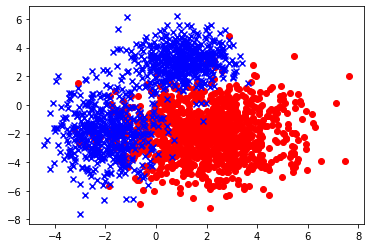

In [6]:
# Affichage
ut.plot2DSet(X2D,Y2D)

## Le calcul de k optimal

In [7]:
def found_k(desc_set,label_set,dimension,retour=True,graphe=True):
    KNN_test_acc=[]
    List_k=[]
    for k in range(1,500*dimension,2):
        desc_train,label_train,desc_test,label_test=ut.crossval_strat(desc_set,label_set,10,2)
        classifeurKNN=classif.ClassifierKNN(dimension,k)
        List_k.append(k)
        classifeurKNN.train(desc_train,label_train)
        accKNN=classifeurKNN.accuracy(desc_test,label_test)
        KNN_test_acc.append(accKNN)

    index=np.argmax(KNN_test_acc)
    
    if graphe:
        plt.plot(List_k,KNN_test_acc)
        plt.title("Le variation de taux accuracy en fonction de k")
        plt.ylabel("Le taux de Accuracy")
        plt.xlabel("Le valeur de K")
        plt.show()
        
        

    if retour:
        return 2*index-1
    

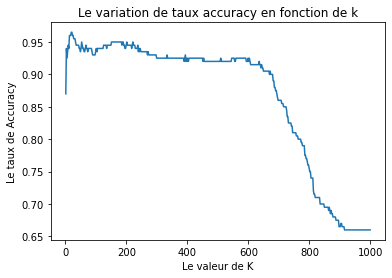

17

In [8]:
k_optimal=found_k(X2D,Y2D,2)
k_optimal

D'après le test,on a fait on a vu que le meilleur k pour ce Data Frame est 17.On teste seulement avec des valeurs impairs car les valeurs pairs créent une effet de mirrior.On en déduit que le taux accuracy arrive à son valeur optimal et commence à diminuer en fonction de k.

## Le plot de KNN Classifieur avec le k_optimal

Accuracy :  0.93


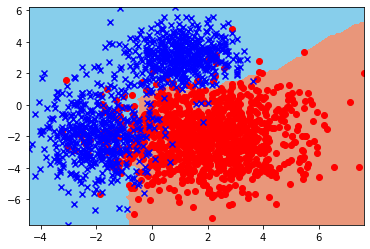

In [9]:
knn_2D = classif.ClassifierKNN(2,k_optimal)

# Cross learning
desc_train, label_train, desc_test, label_test = ut.crossval_strat(X2D,Y2D,10,2)
knn_2D.train(desc_train, label_train)

print("Accuracy : ", knn_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,knn_2D,step=100)
ut.plot2DSet(X2D,Y2D)

Le plot nous montre que le classifieur marche bien.

## Le Temps de calcul 

In [10]:
temps_calcul=0
for i in range(10):
    desc_train,label_train,desc_test,label_test=ut.crossval_strat(X2D,Y2D,10,2)
    debut=time.time()
    classifeurKNNtime=classif.ClassifierKNN(2,k_optimal)
    classifeurKNNtime.train(desc_train,label_train)
    accKNN=classifeurKNNtime.accuracy(desc_test,label_test)
    fin=time.time()
    temps_calcul=temps_calcul+fin-debut

str_temps_calcul_KNN=str(temps_calcul/10)
print("Le temps de calcul est ",str_temps_calcul_KNN," en s")
    

Le temps de calcul est  0.025703239440917968  en s


# Perceptron

## Calcul d'Epsilon optimal

In [11]:
eps=0.1
acc_eps=[]
list_eps=[]
for i in range(10):
    desc_train,label_train,desc_test,label_test=ut.crossval_strat(X2D,Y2D,10,2)
    pcp_2D= classif.ClassifierPerceptron(2,eps,init=0)
    pcp_2D.train(desc_test, label_test)
    acc_eps.append(pcp_2D.accuracy(desc_test,label_test))
    list_eps.append(eps)
    eps=eps*0.1

index=np.argmax(acc_eps)
eps_optimal=list_eps[index]
eps_optimal

0.00010000000000000003

## Calcul de init optimal

In [12]:
initials=[0,1]
accuracy_init=[]
for k in initials:
    desc_train,label_train,desc_test,label_test=ut.crossval_strat(X2D,Y2D,10,2)
    pcp_2D= classif.ClassifierPerceptron(2,eps_optimal,init=k)
    pcp_2D.train(desc_test, label_test)
    accuracy_init.append(pcp_2D.accuracy(desc_test,label_test))

init_optimal=np.argmax(accuracy_init)

init_optimal

0

Accuracy :  0.785


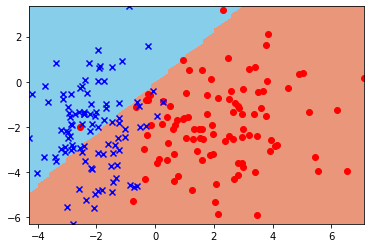

In [13]:
dim = 2
desc_train, label_train, desc_test, label_test = ut.crossval_strat(X2D,Y2D,10,2)

pcp_2D= classif.ClassifierPerceptron(dim,eps_optimal,init=init_optimal)
pcp_2D.train(desc_train, label_train)

print("Accuracy : ", pcp_2D.accuracy(desc_test,label_test))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(desc_test,label_test,pcp_2D,step=60)
ut.plot2DSet(desc_test,label_test)

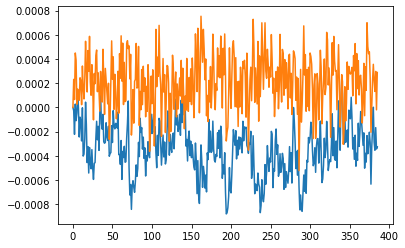

In [14]:
list_allw=pcp_2D.get_allw()

plt.plot(list_allw)
plt.show()

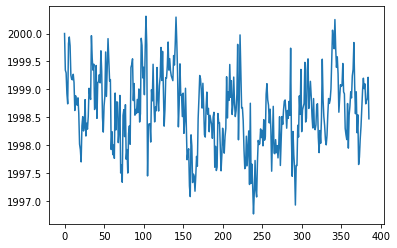

In [15]:
list_cout=ut.costcalcul(X2D,Y2D,list_allw)

plt.plot(list_cout)
plt.show()

# Perceptron Bias

# Test performance

In [16]:
nb_frac=10
random.seed(42)

KNN_acc=[]
Per_acc=[]
Per_bias_acc=[]


for i in range(nb_frac):
    classifeurKNN1=classif.ClassifierKNN(2,k_optimal)
    classifieurper1=classif.ClassifierPerceptron(2,0.01,0)
    classifieurperbias1=classif.ClassifierPerceptronBiais(2,0.01,0)
    desc_train,label_train,desc_test,label_test=ut.crossval_strat(X2D,Y2D,nb_frac,i)
    classifeurKNN1.train(desc_train,label_train)
    accKNN=classifeurKNN1.accuracy(desc_test,label_test)
    KNN_acc.append(accKNN)
    classifieurper1.train(desc_train,label_train)
    accPer=classifieurper1.accuracy(desc_test,label_test)
    Per_acc.append(accPer)
    classifieurperbias1.train(desc_train,label_train)
    accPerbias=classifieurperbias1.accuracy(desc_test,label_test)
    Per_bias_acc.append(accPerbias)

In [17]:
print("Le taux accuracy avec le label test de KNN est ",np.mean(KNN_acc))
print("Le taux accuracy de Perceptron avec le label test est ",np.mean(Per_acc))
print("Le taux accuracy de Perceptron bias avec le label est ",np.mean(Per_bias_acc))


Le taux accuracy avec le label test de KNN est  0.9264999999999999
Le taux accuracy de Perceptron avec le label test est  0.7395
Le taux accuracy de Perceptron bias avec le label est  0.8075000000000001


# Les Données en 5D

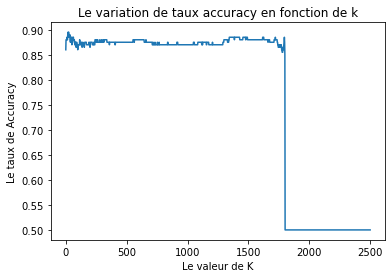

17

In [18]:
k_optimal_5D=found_k(X5D,Y5D,5)
k_optimal_5D

# Taux accuracy de KNN

In [19]:
knn_5D = classif.ClassifierKNN(5,k_optimal_5D)

# Cross learning
desc_train, label_train, desc_test, label_test = ut.crossval_strat(X5D,Y5D,10,2)
knn_5D.train(desc_train, label_train)

print("Accuracy : ", knn_5D.accuracy(X5D,Y5D))


Accuracy :  0.8965


# Le temps de calcul

In [20]:
temps_calcul=0
for i in range(10):
    desc_train,label_train,desc_test,label_test=ut.crossval_strat(X5D,Y5D,10,2)
    debut=time.time()
    classifeurKNNtime=classif.ClassifierKNN(5,k_optimal_5D)
    classifeurKNNtime.train(desc_train,label_train)
    accKNN=classifeurKNNtime.accuracy(desc_test,label_test)
    fin=time.time()
    temps_calcul=temps_calcul+fin-debut

str_temps_calcul_KNN=str(temps_calcul/10)
print("Le temps de calcul est ",str_temps_calcul_KNN," en s")

Le temps de calcul est  0.030172348022460938  en s


# Perceptron Biais 2D

Accuracy :  0.925


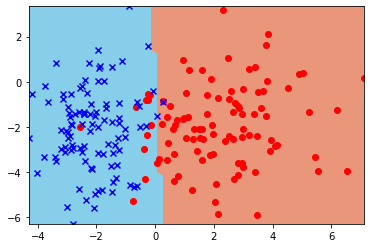

In [21]:
desc_train, label_train, desc_test, label_test = ut.crossval_strat(X2D,Y2D,10,2)

pcp_2D= classif.ClassifierPerceptronBiais(dim,eps,init=0)
pcp_2D.train(desc_test, label_test)

print("Accuracy : ", pcp_2D.accuracy(desc_test,label_test))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(desc_test,label_test,pcp_2D,step=60)
ut.plot2DSet(desc_test,label_test)

Accuracy :  0.8383333333333334


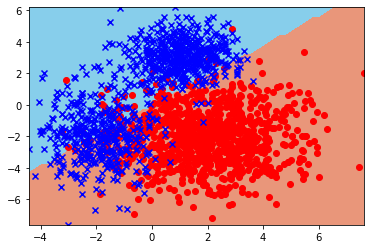

In [22]:
pcp_2D.train(desc_train, label_train)
print("Accuracy : ", pcp_2D.accuracy(desc_train,label_train))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(desc_train,label_train,pcp_2D,step=60)
ut.plot2DSet(desc_train,label_train)

# Perceptron 5D

In [24]:
dim=5
desc_train, label_train, desc_test, label_test = ut.crossval_strat(X5D,Y5D,10,2)
pcp_5D= classif.ClassifierPerceptron(dim,eps,init=0)
pcp_5D.train(desc_train, label_train)

print("Accuracy : ", pcp_5D.accuracy(desc_test,label_test))

Accuracy :  0.845
